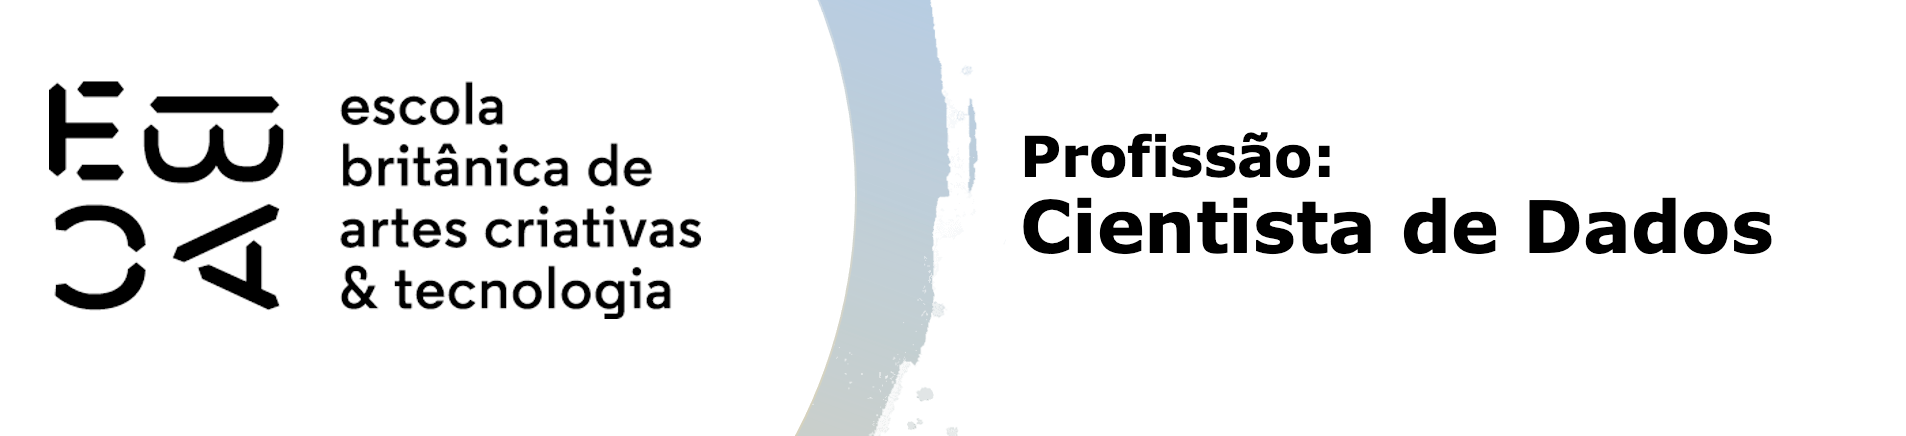

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Como visto, não existem valores nulos nem missing neste banco de dados, logo, podemos pular essa etapa do tratamento.

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [6]:
colunas = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

In [7]:
# 
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Com a função .describe() podemos ver que as variáveis usadas possuem variações muito diferentes, logo, elas precisam ser padronizadas antes de prosseguir com as análises, para não gerar erros.

In [25]:
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[colunas]), columns= df[colunas].columns)
df_pad.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-2.996612e-17,6.281359e-17,-4.610172e-18,-2.535595e-17,4.610172e-17,-8.298309e-17
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01
25%,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-5.560920e-01,-5.281214e-01
50%,-3.959377e-01,-4.147639e-01,-3.964779e-01,-2.449305e-01,-3.087548e-01,-3.113566e-01
75%,5.072280e-01,7.035981e-02,-3.964779e-01,-2.449305e-01,1.409492e-01,1.407881e-01
max,7.431499e+00,1.876956e+01,1.849960e+01,1.786868e+01,1.513858e+01,3.280678e+01


In [26]:
df_pad.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430


Agora que com a base de dados do formato que desejamos, podemos prosseguir os tratamentos.

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [27]:
# Começaremos pelo método do cotovelo.

SSD = []

for i in range (1, 21):
    km = KMeans(n_clusters= i, n_init=10)
    km = km.fit(df_pad[colunas])
    SSD.append(km.inertia_)
    

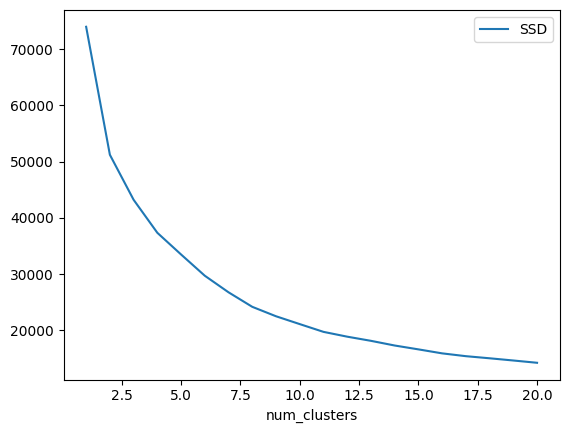

In [28]:
db = pd.DataFrame({'num_clusters': list(range(1, len(SSD)+1)), 'SSD': SSD})
db.plot(x = 'num_clusters', y = 'SSD');

In [29]:
# Agora testaremos o método da silueta

silhouttes = []
max_clusters = 20 

for i in range(2,max_clusters+1):
    km = KMeans(n_clusters= i, n_init=10).fit(df_pad)
    silhouttes.append(silhouette_score(df_pad, km.labels_))
    nomes_grupos = ['grupo_' + str(j) for j in range (i)]
    df['grupos_' + str(i)] = pd.Categorical.from_codes(km.labels_, categories= nomes_grupos)

In [30]:
silhouttes

[0.6224236579741643,
 0.5077713752498578,
 0.5016609862027204,
 0.47404257355821183,
 0.4607368294375249,
 0.4586489420378177,
 0.46605752962838315,
 0.42296196870524705,
 0.4099533163041276,
 0.4201713375224972,
 0.4177219361435577,
 0.41950897063572856,
 0.4191982505831915,
 0.41602886076460954,
 0.405895776867153,
 0.3836740388842818,
 0.3655752286671386,
 0.3606492150369169,
 0.36788875776414015]

<Axes: xlabel='n_clusters'>

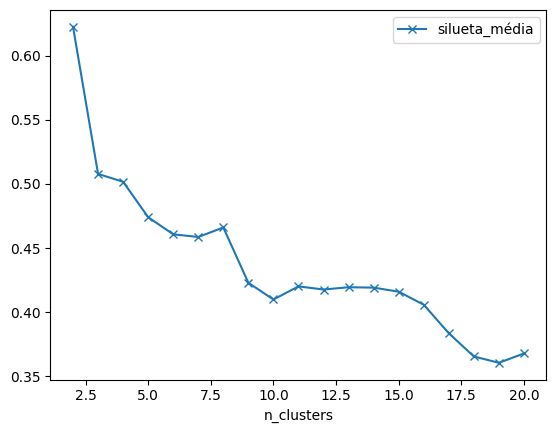

In [31]:
df_siluetas = pd.DataFrame({'n_clusters': list(range(2, 21)), 'silueta_média': silhouttes})

df_siluetas.plot.line(x = 'n_clusters', y = 'silueta_média', marker='x')

Pelos dois modos de análise, vemos que 4 clusters parece ser o número ideal para este banco de dados.

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

Como foi mostrado, 4 grupos é o número ideal, neste exercício, usaremos 3 e 4 grupos

In [32]:
cluster_3 = KMeans(n_clusters=3)
cluster_3.fit_predict(df_pad)
cluster_4 = KMeans(n_clusters= 4)
cluster_4.fit_predict(df_pad)

c:\Users\samsun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\samsun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, ..., 2, 2, 2])

In [41]:
df_pad['grupos_3'] = pd.Categorical(cluster_3.labels_)
df_pad['grupos_4'] = pd.Categorical(cluster_4.labels_)

In [46]:
df_pad['grupos_3'].replace({1:"pouco_acesso", 0:"administrativo", 3:"informativo", 2:"produtos"}, inplace=True)
df_pad['grupos_4'].replace({1:"pouco_acesso", 0:"administrativo", 3:"informativo", 2:"produtos"}, inplace=True)

C:\Users\samsun\AppData\Local\Temp\ipykernel_20652\3589934873.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pad['grupos_3'].replace({1:"pouco_acesso", 0:"administrativo", 3:"informativo", 2:"produtos"}, inplace=True)
C:\Users\samsun\AppData\Local\Temp\ipykernel_20652\3589934873.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename

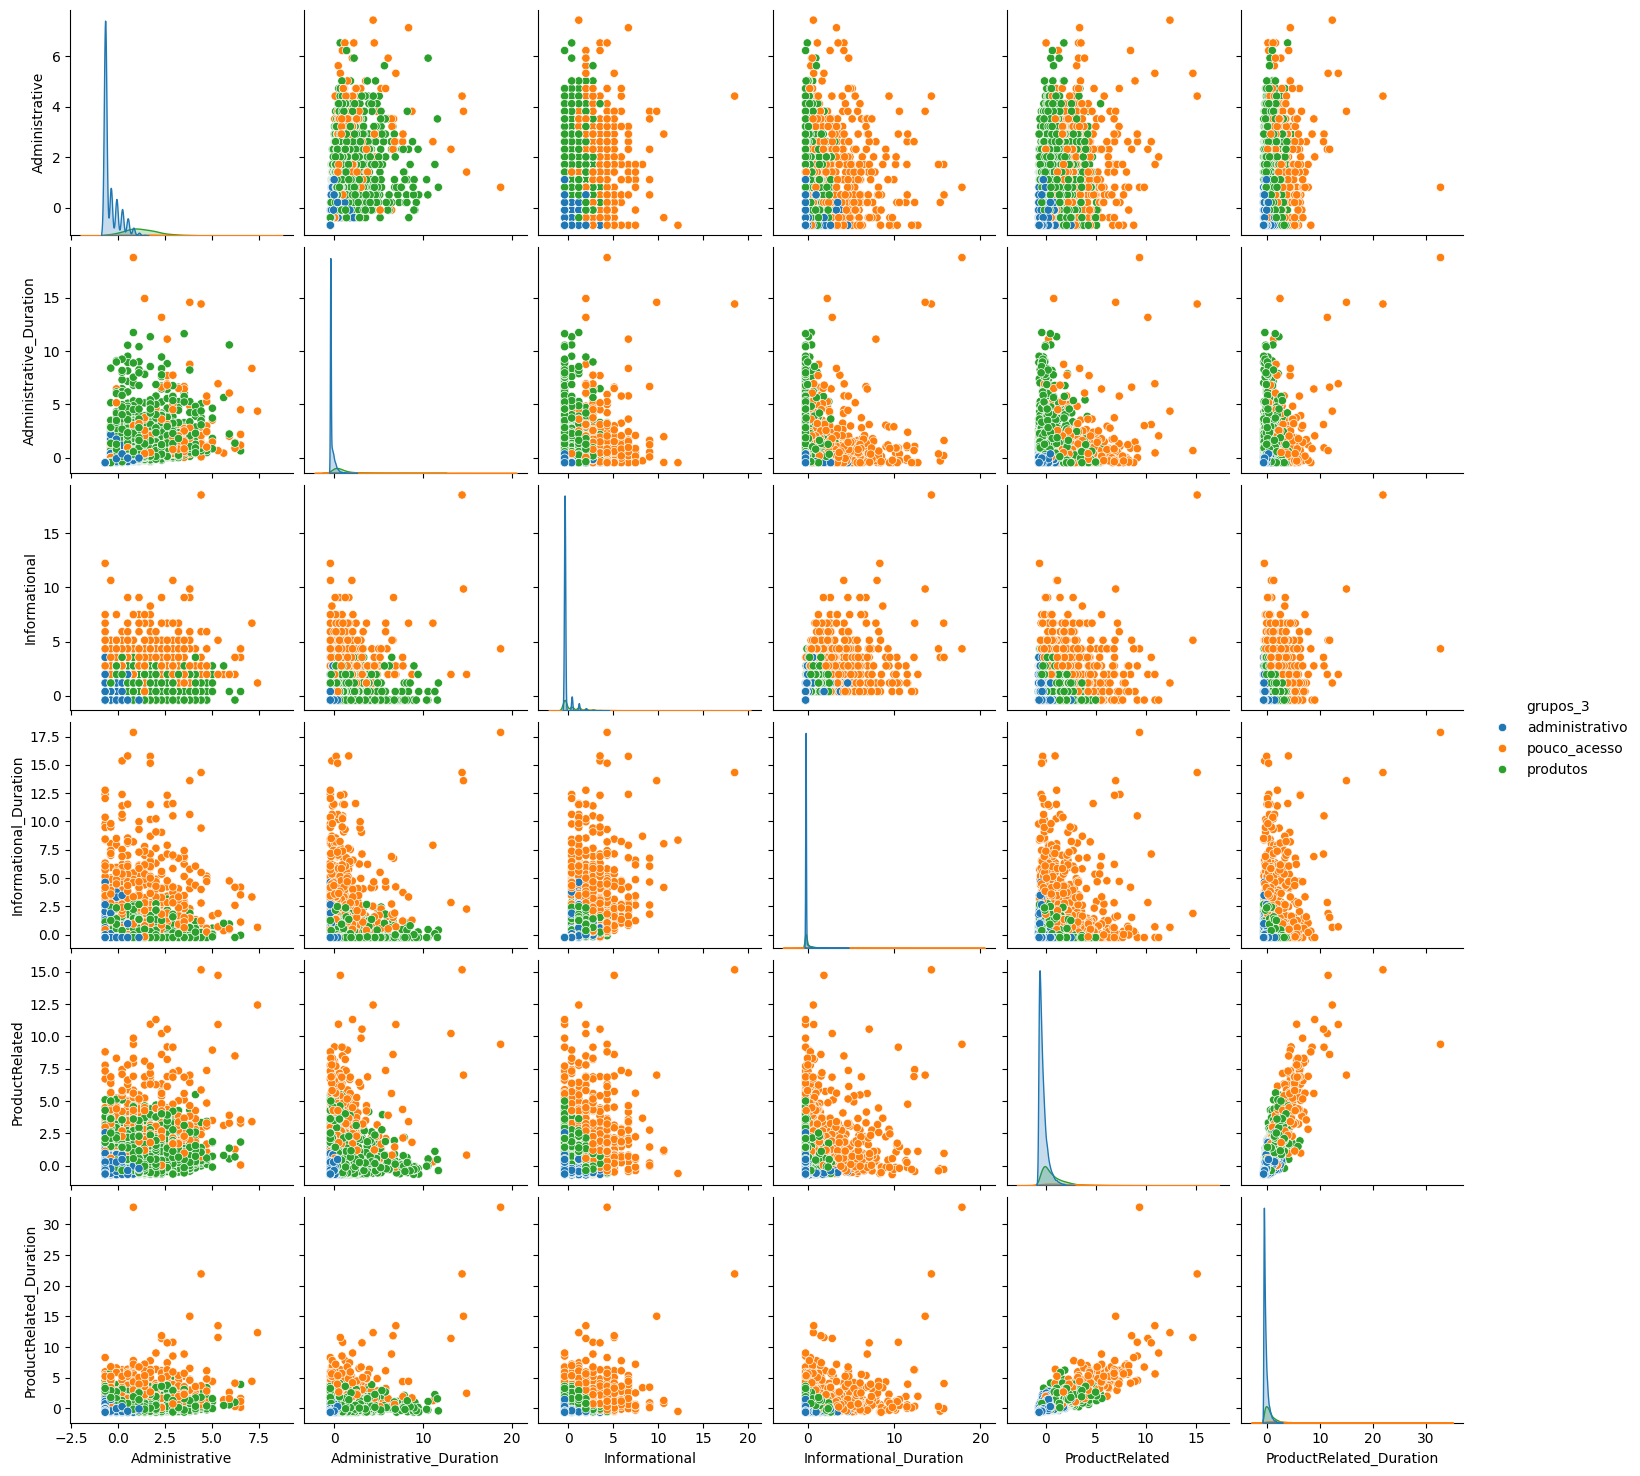

In [50]:
sns.pairplot(df_pad, hue='grupos_3')


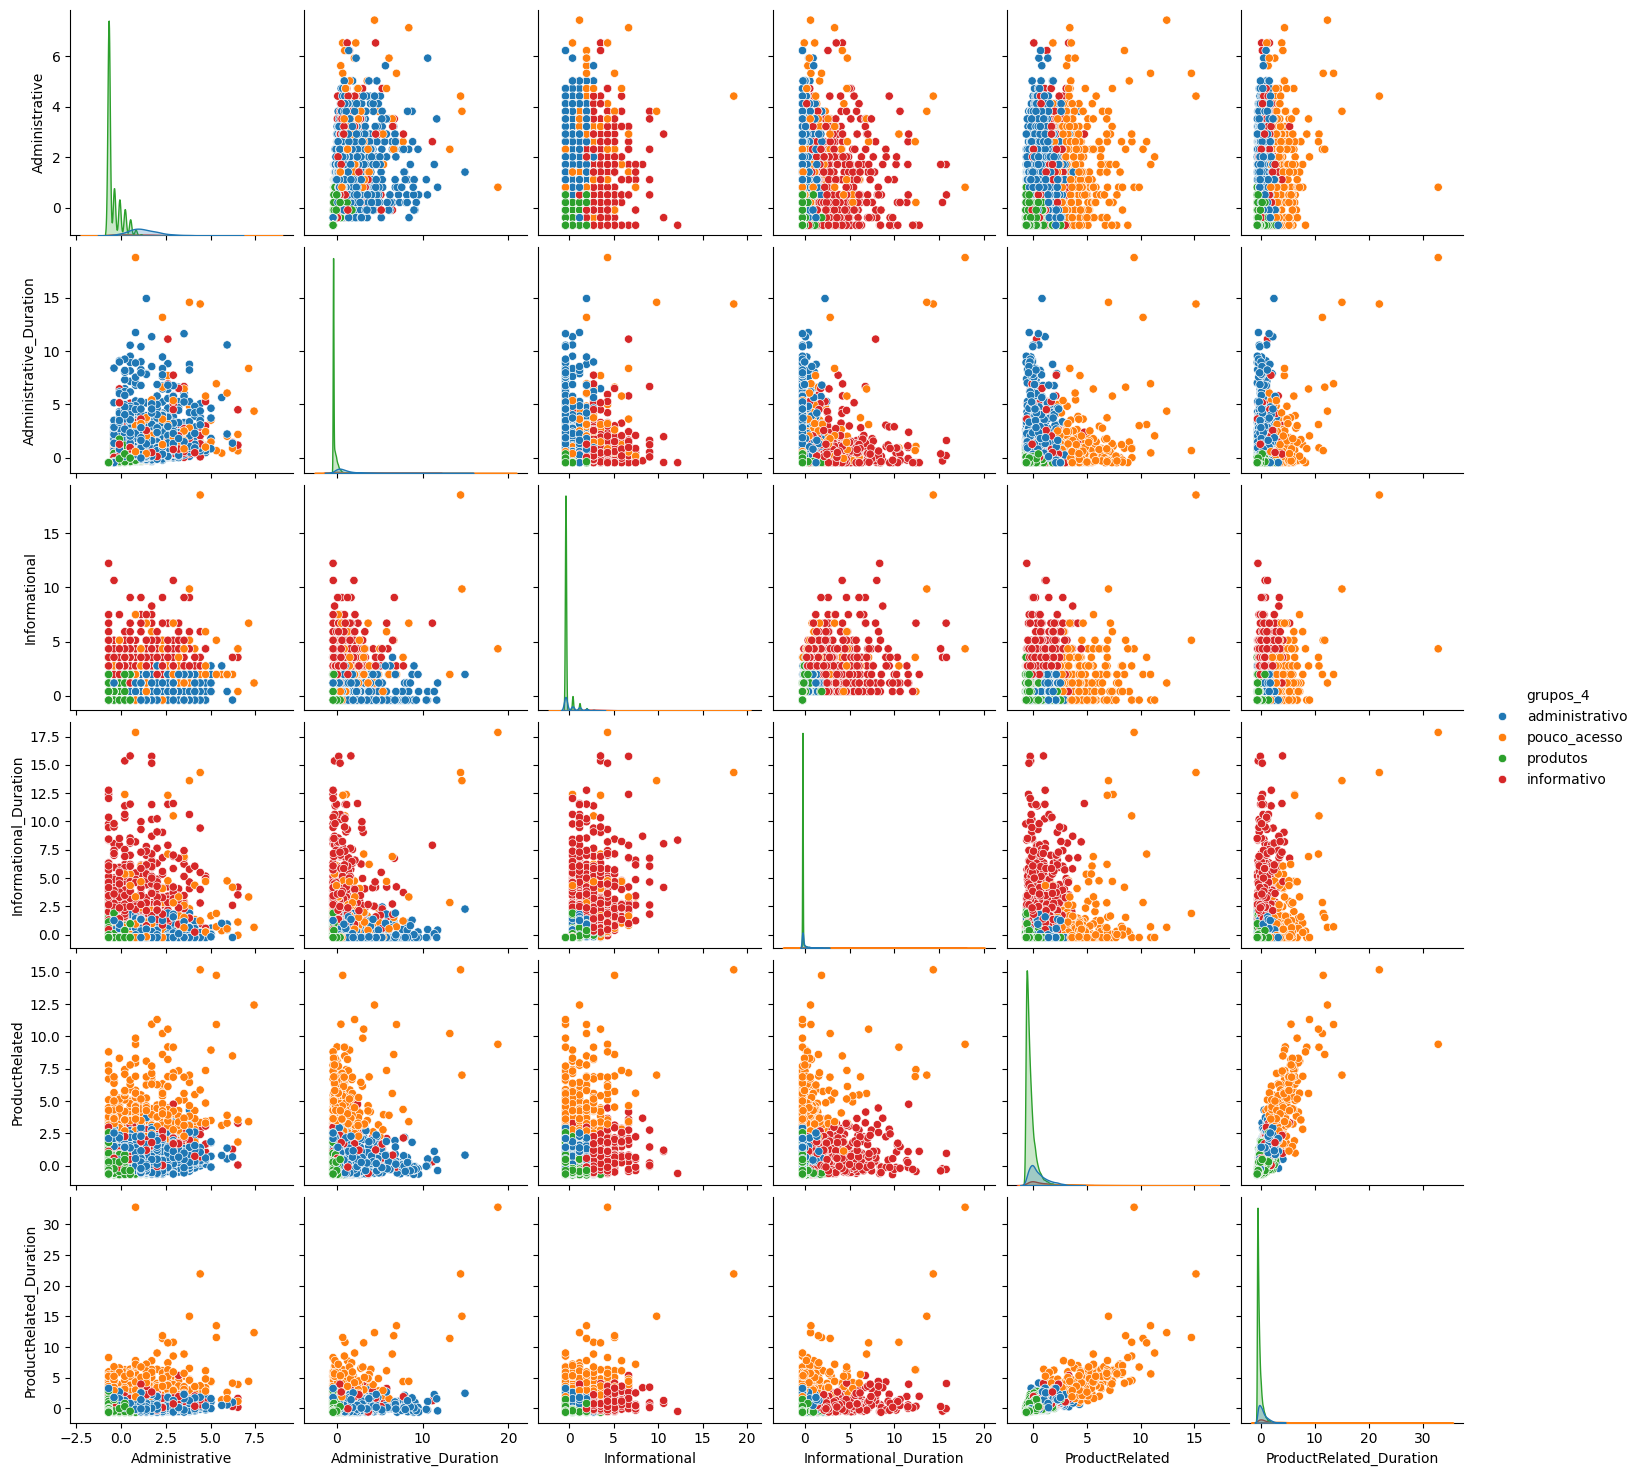

In [51]:
sns.pairplot(df_pad, hue='grupos_4')


Como visto anteriormente, 4 clusters é o número ideal, logo, avançaremos apeans com este número para a próxima análise.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [56]:
crosstab = pd.crosstab(df_pad.grupos_4, df.Revenue)
crosstab

Revenue,False,True
grupos_4,,
administrativo,1763,516
pouco_acesso,193,97
produtos,8056,1144
informativo,410,151


In [59]:
bins = [0, 0.2, 0.4, 0.6, 1.0]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-1.0']

pd.crosstab(df['grupos_4'], pd.cut(df['BounceRates'], bins=bins, labels=labels, right=False))

BounceRates,0-0.2,0.2-0.4
grupos_4,,
grupo_0,553,0
grupo_1,2182,0
grupo_2,8520,700
grupo_3,375,0


Pelas tabelas acima, vemos primeiramente, que a variável "Revenue" é mais eficiente na nossa análise, não só pelo fato desta ser booleana, mas também pois essa indica diretamente se houve compra ou não.
Além disso, podemos ver que o terceiro grupo, aquele que foi chamado de "produtos" é o grupo mais propenso à compra.